# 볼린저 밴드 구하기

볼린저 밴드는 주가의 20일 이동 평균선을 기준으로,  
상대적인 고점을 나타내는 **상단 밴드**와 상대적인 저점을 나타내는 **하단 밴드**로 구성됨

주가가 **상단 밴드** 근처 -> 상대적인 고점에 있음  
주가가 **하단 밴드** 근처 -> 상대적인 저점에 있음  

밴드폭이 좁음 -> 주가 변동성 작음  
밴드폭이 넓음 -> 주가 변동성 큼

**볼린저 밴드 공식**  
* 상단 볼린저 밴드 = 중간 볼린저 밴드 + (2 x 표준편차)  
* 중간 볼린저 밴드 = 종가의 20일 이동평균  
* 하단 볼린저 밴드 = 중간 볼린저 밴드 - (2 x 표준편차)

In [5]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [6]:
df = fdr.DataReader('035420', '2019-01-02')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,121000,122000,117000,118000,356120,-0.032787
2019-01-03,120000,125000,119000,122000,525020,0.033898
2019-01-04,123500,126000,122500,125500,520785,0.028689
2019-01-07,128000,132500,127000,131500,502619,0.047809
2019-01-08,132000,134000,129000,130000,376127,-0.011407
2019-01-09,131000,134500,129500,133000,381372,0.023077
2019-01-10,132000,134500,130000,131000,293112,-0.015038
2019-01-11,133000,134500,130500,131000,322925,0.000000
2019-01-14,130000,130500,125000,127000,525411,-0.030534


In [7]:
len(df)

634

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 634 entries, 2019-01-02 to 2021-07-23
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    634 non-null    int64  
 1   High    634 non-null    int64  
 2   Low     634 non-null    int64  
 3   Close   634 non-null    int64  
 4   Volume  634 non-null    int64  
 5   Change  634 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 34.7 KB


In [9]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-07-19,443000,449500,438500,443000,704307,-0.008949
2021-07-20,438500,441500,431000,439000,789090,-0.009029
2021-07-21,443000,446000,428000,428000,885519,-0.025057
2021-07-22,433000,445000,429000,440000,1035882,0.028037
2021-07-23,443500,454500,441000,452000,1059964,0.027273


In [10]:
df['MA20'] = df['Close'].rolling(window=20).mean()  # ① 20일 이동 평균. 중간 볼린저 밴드
df['stddev'] = df['Close'].rolling(window=20).std() # ② 표준편차
df['upper'] = df['MA20'] + (df['stddev'] * 2)   # ③ 상단 볼린저 밴드 (중간 볼린저 밴드 + (2 x 표준편차))
df['lower'] = df['MA20'] - (df['stddev'] * 2)   # ④ 하단 볼린저 밴드 (중간 볼린저 밴드 - (2 x 표준편차))

In [11]:
df

,Open,High,Low,Close,Volume,Change,MA20,stddev,upper,lower
Date,,,,,,,,,,
2019-01-02,121000,122000,117000,118000,356120,-0.032787,NaN,NaN,NaN,NaN
2019-01-03,120000,125000,119000,122000,525020,0.033898,NaN,NaN,NaN,NaN
2019-01-04,123500,126000,122500,125500,520785,0.028689,NaN,NaN,NaN,NaN
2019-01-07,128000,132500,127000,131500,502619,0.047809,NaN,NaN,NaN,NaN
2019-01-08,132000,134000,129000,130000,376127,-0.011407,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-07-19,443000,449500,438500,443000,704307,-0.008949,421250.0,15540.693610,452331.387221,390168.612779
2021-07-20,438500,441500,431000,439000,789090,-0.009029,423650.0,14278.342083,452206.684165,395093.315835
2021-07-21,443000,446000,428000,428000,885519,-0.025057,423875.0,14311.271781,452497.543563,395252.456437


In [12]:
df.Close[:20].mean()

130425.0

In [13]:
df.Close[1:21].mean()

131325.0

In [14]:
df = df[19:] # 19번째 행까지 NaN이므로 값이 있는 20번째 행부터 사용

In [15]:
df.head()

,Open,High,Low,Close,Volume,Change,MA20,stddev,upper,lower
Date,,,,,,,,,,
2019-01-29,129999,136500,129999,136000,411369,0.030303,130425.0,4583.365231,139591.730462,121258.269538
2019-01-30,139000,139500,133000,136000,462280,0.000000,131325.0,3696.637875,138718.275750,123931.724250
2019-01-31,138000,143500,136000,136000,1054276,0.000000,132025.0,3118.176761,138261.353523,125788.646477
2019-02-01,138000,140000,133000,133500,530284,-0.018382,132425.0,2725.488850,137875.977701,126974.022299
2019-02-07,132000,134000,128500,129000,737938,-0.033708,132300.0,2825.634535,137951.269070,126648.730930


In [16]:
df.tail()

,Open,High,Low,Close,Volume,Change,MA20,stddev,upper,lower
Date,,,,,,,,,,
2021-07-19,443000,449500,438500,443000,704307,-0.008949,421250.0,15540.693610,452331.387221,390168.612779
2021-07-20,438500,441500,431000,439000,789090,-0.009029,423650.0,14278.342083,452206.684165,395093.315835
2021-07-21,443000,446000,428000,428000,885519,-0.025057,423875.0,14311.271781,452497.543563,395252.456437
2021-07-22,433000,445000,429000,440000,1035882,0.028037,424900.0,14710.003757,454320.007514,395479.992486
2021-07-23,443500,454500,441000,452000,1059964,0.027273,427000.0,15450.259749,457900.519498,396099.480502


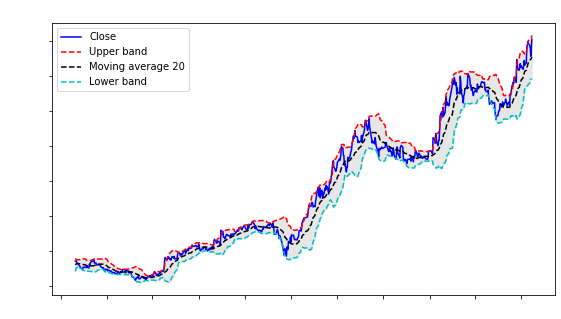

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')   # 파란 실선 
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')   # 빨간 점선
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.xticks(color='white')
plt.yticks(color='white')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  # 상단/하단 볼린저 밴드 사이 회색으로
plt.legend(loc='best')
plt.title('NAVER Bollinger Band (20 day, 2 std)',color='white')
plt.show()

# 볼린저 밴드 지표

## 볼린저 밴드 지표 1 : %b

%b : 주가가 볼린저 밴드 어디에 위치하는지를 나타내는 지표  

종가가 상단 밴드에 걸쳐 있을 때 1.0이 되고, 중간에 걸쳐 있을 때 0.5가 되며, 하단에 걸쳐 있을 때 0.0이 된다

%b=(종가−하단볼린저밴드)/(상단볼린저밴드−하단볼린저밴드)

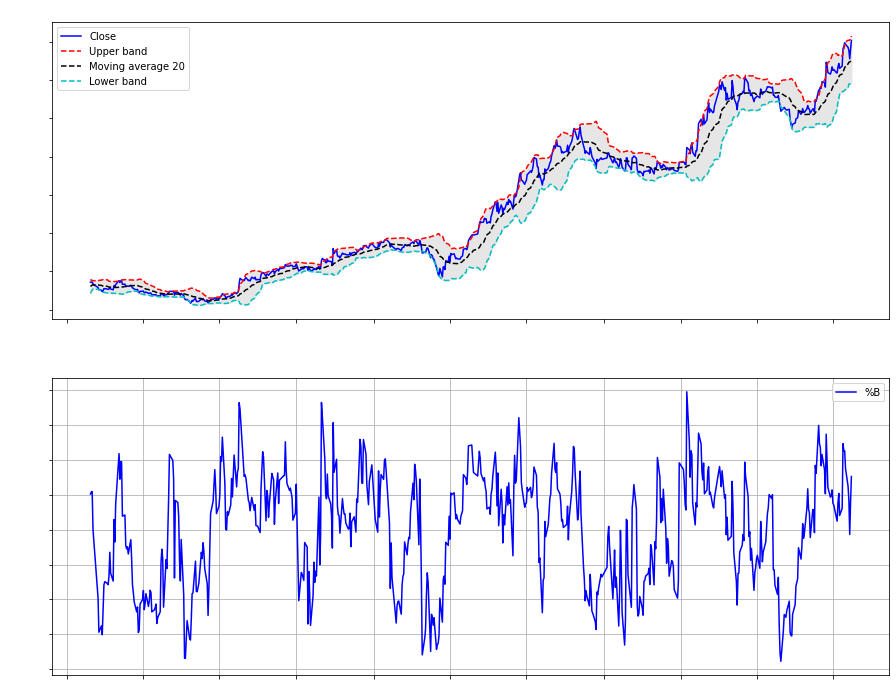

In [24]:
import matplotlib.pyplot as plt

df = fdr.DataReader('035420', '2019-01-02')
  
df['MA20'] = df['Close'].rolling(window=20).mean() 
df['stddev'] = df['Close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['Close'] - df['lower']) / (df['upper'] - df['lower'])  # 신규 추가 코드
df = df[19:]

plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)  # 첫번째 차트
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.xticks(color='white')
plt.yticks(color='white')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)', color='white')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  # 두 번째 차트
plt.plot(df.index, df['PB'], color='b', label='%B')  
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 볼린저 밴드 지표 2 : 밴드폭

밴드폭 : 상단 볼린저 밴드와 하단 볼린저 밴드 사이의 폭으로, 스퀴즈를 확인하는데 유용한 지표  
스퀴즈 : 변동성이 극히 낮은 수준까지 떨어져서 곧이어 변동성 증가가 발생할 것으로 예상되는 상황

밴드폭=(상단볼린저밴드−하단볼린저밴드)/중간볼린저밴드

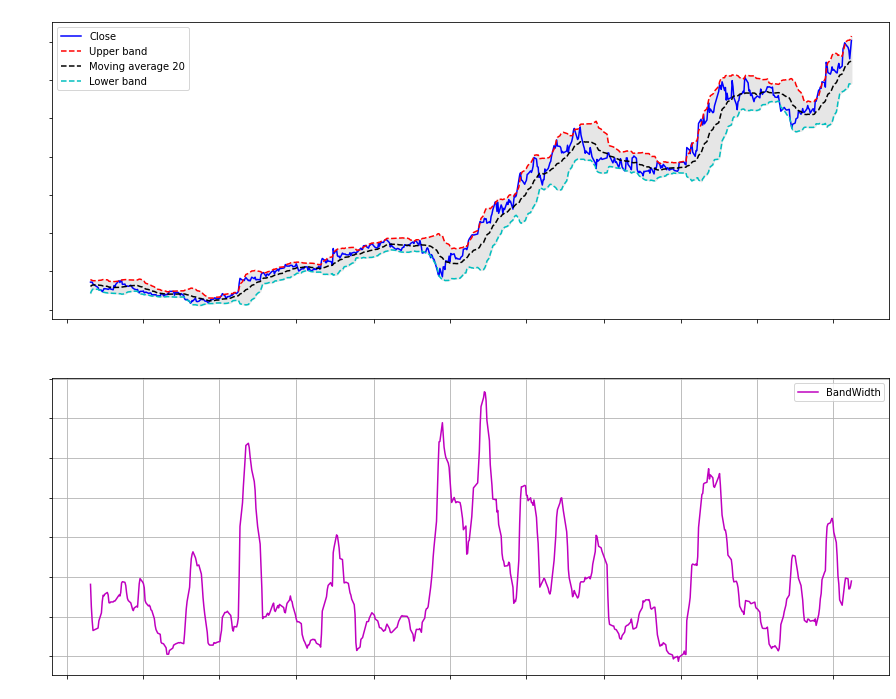

In [25]:
df = fdr.DataReader('035420', '2019-01-02')

df['MA20'] = df['Close'].rolling(window=20).mean()
df['stddev'] = df['Close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
# df['PB'] = (df['Close'] - df['lower']) / (df['upper'] - df['lower']) 기존 코드
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100 # 이렇게 고치자!
df = df[19:]

plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.xticks(color='white')
plt.yticks(color='white')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)', color='white')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
# plt.plot(df.index, df['PB'], color='b', label='%B') 기존 코드
plt.plot(df.index, df['bandwidth'], color='m', label='BandWidth') # 이렇게 고치자! # 자홍색 실선
plt.grid(True)
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(loc='best')
plt.show()

# 불린저 밴드 매매기법 

## 추세 추총 기법

앞에서 살펴본 **%b**는 볼린저 밴드 어디에 주가가 위치하는지를 나타내며 주가와 연계해 트레이딩 시스템을 구축할 때 필요한 핵심 수단이다.  

**밴드폭**은 밴드의 너비를 수치로 나타낸 것으로 추세의 시작과 끝을 포착하는 역할을 한다.  

추세 추종(Trend Follwing) : 상승 추세에 매수하고 하락 추세에 매도하는 기법  
상승 추세나 하락 추세의 시작을 단순히 %b 지표만 이용해서 주가가 볼린저 상/하단 밴드에 태그했는지 여부로만 판단하지는 않는다.  


현금흐름지표(MFI)나 일중강도(II)같은 거래량 관련 지표를 함께 이용해서 확증이 이루어진 경우에만 매수/매도에 들어간다.  
  
  
- 매수 : 주가가 상단 밴드에 접근하며, 지표가 강세를 확증할 때만 매수     
(%b가 0.8보다 크고, MFI가 80보다 클 때)
- 매도 : 주가가 하단 밴드에 접근하며, 지표가 약세를 확증할 때만 매도  
(%b가 0.2보다 작고, MFI가 20보다 작을 때)

## MFI (현금흐름지표, Money Flow Index) - 거래량 관련 지표

 - 중심 가격(Typical Price) : 일정 기간의 고가, 저가, 종가를 합한 뒤에 3으로 나눈 것 (트레이딩 집중 발생)
 - 현금 흐름(Money Flow) : 중심 가격에 거래량을 곱한 것

MFI는 가격과 거래량을 동시에 분석하므로 상대적으로 다른 지표들보다 신뢰도가 더 높다.  

거래량 지표들은 일반적으로 주가에 선행한다는 특징이 있다.  

MFI는 상승일 동안의 현금 흐름의 합(긍정적 현금 흐름)과 하락일 동안의 현금 흐름의 합(부정적 현금 흐름)을 이용한다.

MFI=100−(100/(1+긍정적현금흐름/부정적현금흐름))

- 긍정적 현금 흐름 : 중심 가격이 전일보다 상승한 날들의 현금 흐름의 합
- 부정적 현금 흐름 : 중심 가격이 전일보다 하락한 날들의 현금 흐름의 합

In [29]:
df = fdr.DataReader('035420', '2019-01-02')

df['MA20'] = df['Close'].rolling(window=20).mean()  # 이동평균선
df['stddev'] = df['Close'].rolling(window=20).std()  # 표준편차
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)

df['PB'] = (df['Close'] - df['lower']) / (df['upper'] - df['lower']) # 밴드폭

# 고가, 저가, 종가의 합을 3으로 나눠서 중심 가격 TP(Typical Price)를 구한다.
df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3
df['PMF'] = 0
df['NMF'] = 0

In [1]:
df

NameError: name 'df' is not defined

In [31]:
# range 함수는 마지막 값을 포함하지 않으므로 0부터 종가개수 -2까지 반복할 것이다.
for i in range(len(df.Close)-1):
    # i번째 중심 가격보다 i+1번째 중심 가격이 높으면
    if df.TP.values[i] < df.TP.values[i+1]:
        # i+1번째 중심 가격과 i+1번째 거래량의 곱을
        # i+1번째 긍정적 현금 흐름 PMF(Positive Money Flow)에 저장한다.
        df.PMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        # i+1번째 부정적 현금 흐름 NMF(Negative Money Flow)값은 0으로 저장한다.
        df.NMF.values[i+1] = 0
    else:
        # 반대의 경우에는 NMF를 계산하고
        df.NMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        # PFM의 값은 0으로 저장합니다.
        df.PMF.values[i+1] = 0

# 이 시점에서 긍정적 현금 흐름 PMF과 부정적 현금 흐름 열 NMF가 새로 추가되었습니다.
# 하지만 긍정적 현금 흐름과 부정적 현금 흐름을 다 계산한 것은 아닙니다.
# 합을 구해야 하기 때문입니다!

# 10일 동안의 긍정적 현금 흐름의 합을 10일 동안의 부정적 현금 흐름의 합으로 나눈 결과를
# MFR(Money Flow Ratio) 열에 저장한다.
df['MFR'] = (df.PMF.rolling(window=10).sum() /
    df.NMF.rolling(window=10).sum())

# 10일 기준으로 현금 흐름 지수를 계산한 결과를 MFI10(Money Flow Index 10)열에 저장한다.
# MFI = 100 - (100 / (1+긍정적 현금 흐름 / 부정적 현금흐름))
df['MFI10'] = 100 - 100 / (1 + df['MFR'])

In [32]:
df = df[19:]

In [33]:
df

,Open,High,Low,Close,Volume,Change,MA20,stddev,upper,lower,PB,TP,PMF,NMF,MFR,MFI10
Date,,,,,,,,,,,,,,,,
2019-01-29,129999,136500,129999,136000,411369,0.030303,130425.0,4583.365231,139591.730462,121258.269538,0.804089,134166.333333,55191870377,0,1.119060,52.809272
2019-01-30,139000,139500,133000,136000,462280,0.000000,131325.0,3696.637875,138718.275750,123931.724250,0.816166,136166.666667,62947126666,0,1.232677,55.210709
2019-01-31,138000,143500,136000,136000,1054276,0.000000,132025.0,3118.176761,138261.353523,125788.646477,0.818696,138500.000000,146017226000,0,1.619566,61.825736
2019-02-01,138000,140000,133000,133500,530284,-0.018382,132425.0,2725.488850,137875.977701,126974.022299,0.598606,135500.000000,0,71853482000,1.093327,52.229162
2019-02-07,132000,134000,128500,129000,737938,-0.033708,132300.0,2825.634535,137951.269070,126648.730930,0.208030,130500.000000,0,96300909000,0.980458,49.506628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-19,443000,449500,438500,443000,704307,-0.008949,421250.0,15540.693610,452331.387221,390168.612779,0.849888,443666.666667,0,312477539000,3.317330,76.837536
2021-07-20,438500,441500,431000,439000,789090,-0.009029,423650.0,14278.342083,452206.684165,395093.315835,0.768764,437166.666667,0,344963845000,2.706815,73.022662
2021-07-21,443000,446000,428000,428000,885519,-0.025057,423875.0,14311.271781,452497.543563,395252.456437,0.572059,434000.000000,0,384315246000,1.826633,64.622217


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 615 entries, 2019-01-29 to 2021-07-23
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    615 non-null    int64  
 1   High    615 non-null    int64  
 2   Low     615 non-null    int64  
 3   Close   615 non-null    int64  
 4   Volume  615 non-null    int64  
 5   Change  615 non-null    float64
 6   MA20    615 non-null    float64
 7   stddev  615 non-null    float64
 8   upper   615 non-null    float64
 9   lower   615 non-null    float64
 10  PB      615 non-null    float64
 11  TP      615 non-null    float64
 12  PMF     615 non-null    int64  
 13  NMF     615 non-null    int64  
 14  MFR     615 non-null    float64
 15  MFI10   615 non-null    float64
dtypes: float64(9), int64(7)
memory usage: 81.7 KB


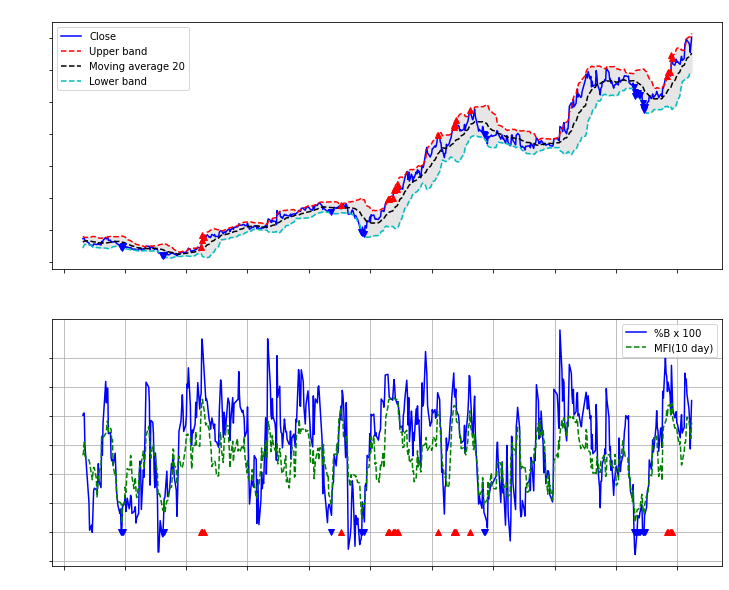

In [38]:
plt.figure(figsize=(12, 10))

# 첫번째 차트 시작
plt.subplot(2, 1, 1)
plt.title('NAVER Bollinger Band(20 day, 2 std) - Trend Following', color = 'white')
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')

for i in range(len(df.Close)):
    # %b가 0.8보다 크고 10일 기준 MFI가 80보다 크면
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        # 매수 시점을 나타내기 위해 첫 번째 그래프의 종가 위치에 빨간색 삼각형을 표시합니다.
        plt.plot(df.index.values[i], df.Close.values[i], 'r^')

    # %b가 0.2보다 작고 10일 기준 MFI가 20보다 작으면
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        # 매도 시점을 나타내기 위해 첫 번째 그래프의 종가 위치에 파란색 삼각형을 표시합니다.  
        plt.plot(df.index.values[i], df.Close.values[i], 'bv')
    plt.xticks(color='white')
    plt.yticks(color='white')
plt.legend(loc='best')


# 두번째 차트 시작
plt.subplot(2, 1, 2)

# MFI와 비교할 수 있게 %b를 그대로 표시하지 않고 100을 곱해서 푸른색 실선으로 표시합니다.  
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100') 

# 10일 기준 MFI(현금흐름지표)를 녹색의 점선으로 표시합니다. 
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)')

# y축 눈금을 -20부터 120까지 20 단위로 표시합니다.
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])
for i in range(len(df.Close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(loc='best')
plt.show();